# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\troyp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
%pip install newsapi


Note: you may need to restart the kernel to use updated packages.


In [8]:
# Read your api key environment variable
load_dotenv()
news_api_key = ("dbb1365f37934a19b6b64fe77327bc59")

In [9]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=news_api_key)

In [10]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(q="bitcoin",language="en",sort_by="relevancy")

In [11]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q='ethereum',language="en",sort_by="relevancy")

In [12]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "Text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Positive", "Negative", "Neutral","Text"]
btc = btc[cols]

btc.head()

,Compound,Positive,Negative,Neutral,Text
0,0.0772,0.036,0.000,0.964,"Now, even though there are a number of women-f..."
1,-0.0516,0.056,0.061,0.882,A Bitcoin mining site powered by otherwise los...
2,0.4019,0.088,0.000,0.912,Wikipedia editors have voted in favor of dropp...
3,-0.3269,0.085,0.143,0.772,Warren Buffett has always been a bitcoin skept...
4,0.3400,0.072,0.000,0.928,"Image source, Getty Images\r\nThe value of Bit..."


In [13]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
    
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth= pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Positive", "Negative", "Neutral","Text"]
eth = eth[cols]

eth.head()

,Compound,Positive,Negative,Neutral,Text
0,-0.7845,0.088,0.231,0.681,The US Department of Treasury says Lazarus is ...
1,0.1027,0.084,0.071,0.844,"18 with 15 posters participating, including st..."
2,0.6486,0.135,0.000,0.865,Meta has revealed more of how NFTs will work o...
3,0.7351,0.188,0.000,0.812,"Opera launched its dedicated ""Crypto Browser"" ..."
4,-0.2263,0.046,0.075,0.879,A multi-billion dollar cryptocurrency company ...


In [14]:
# Describe the Bitcoin Sentiment
btc.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.00000,20.000000,20.000000
mean,0.039835,0.07210,0.060950,0.866900
std,0.404467,0.06750,0.061445,0.093058
min,-0.549900,0.00000,0.000000,0.557000
25%,-0.335475,0.00000,0.000000,0.836000
50%,0.089950,0.07400,0.063000,0.888000
75%,0.355075,0.08575,0.077000,0.924250
max,0.750600,0.20200,0.241000,0.964000


In [15]:
# Describe the Ethereum Sentiment
eth.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.081860,0.053050,0.069000,0.877900
std,0.481385,0.064728,0.072897,0.074939
min,-0.784500,0.000000,0.000000,0.681000
25%,-0.381800,0.000000,0.000000,0.827250
50%,-0.273200,0.023000,0.063000,0.899500
75%,0.303775,0.085000,0.077750,0.935500
max,0.735100,0.188000,0.233000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: BTC  had the highest mean postive score of .07210.

Q: Which coin had the highest compound score?

A: BTC had the highest compund score of .750600.

Q. Which coin had the highest positive score?

A: BTC had the highest postive score of .20200.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [16]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [17]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stop = stopwords.words('english')

# Expand the default stopwords list if necessary
stop.append("u")
stop.append("t")
stop.append('alex')
stop.append('castro')
stop.append("chars")
stop.append('illustration')
stop.append('el')
stop.append('salvador')
stop.append('feb')
stop.append('time')
stop.append("newsletter")
stop.append("lichtensteins")
stop.append("mr.")
stop.append("arent")
stop.append("paying")
stop.append("even")
stop.append("attention")
stop.append("might")
stop.append("noticed")
stop.append("last")
stop.append("week")
stop.append("total")
stop.append("version")
stop.append("article")
stop.append("published")
stop.append("subscribe")
stop.append("weekly")
stop.append("guide")
stop.append("future")
stop.append("find")
stop.append("past")
stop.append("non")
stop.append("end")
stop.append("said")
stop.append("true")
stop.append("shell")
stop.append("making")
stop.append("tr")
stop.append("known")
stop.append("announced")
stop.append("based")
stop.append("always")
stop.append("point")
stop.append("via")
stop = set(stop)

In [18]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a tokenized list of the words
    words = word_tokenize(text)
    
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation from text
    words = list(filter(lambda t: t not in punctuation, words))
   
    # Remove the stop words
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
   
    return tokens

In [19]:
# Create a new tokens column for Bitcoin
btc["tokens"] = btc.Text.apply(tokenizer)
btc.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,0.0772,0.036,0.000,0.964,"Now, even though there are a number of women-f...","[though, number, women-focused, crypto, space,..."
1,-0.0516,0.056,0.061,0.882,A Bitcoin mining site powered by otherwise los...,"[Bitcoin, mining, site, powered, otherwise, lo..."
2,0.4019,0.088,0.000,0.912,Wikipedia editors have voted in favor of dropp...,"[Wikipedia, editor, voted, favor, dropping, cr..."
3,-0.3269,0.085,0.143,0.772,Warren Buffett has always been a bitcoin skept...,"[Warren, Buffett, bitcoin, skeptic, billionair..."
4,0.3400,0.072,0.000,0.928,"Image source, Getty Images\r\nThe value of Bit...","[Image, source, Getty, Images, value, Bitcoin,..."


In [20]:
# Create a new tokens column for Ethereum
eth["tokens"] = eth.Text.apply(tokenizer)
eth.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,-0.7845,0.088,0.231,0.681,The US Department of Treasury says Lazarus is ...,"[US, Department, Treasury, say, Lazarus, behin..."
1,0.1027,0.084,0.071,0.844,"18 with 15 posters participating, including st...","[18, 15, poster, participating, including, sto..."
2,0.6486,0.135,0.000,0.865,Meta has revealed more of how NFTs will work o...,"[Meta, revealed, NFTs, work, Instagram, US-bas..."
3,0.7351,0.188,0.000,0.812,"Opera launched its dedicated ""Crypto Browser"" ...","[Opera, launched, dedicated, ``, Crypto, Brows..."
4,-0.2263,0.046,0.075,0.879,A multi-billion dollar cryptocurrency company ...,"[multi-billion, dollar, cryptocurrency, compan..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [21]:
from collections import Counter
from nltk import ngrams

In [22]:
# Generate the Bitcoin N-grams where N=2
N=2
grams=ngrams(tokenizer(btc.Text.str.cat()), N)
Counter(grams).most_common(10)


[(('world', "'s"), 5),
 (('Reuters', 'Bitcoin'), 5),
 (('previous', 'close'), 4),
 (('close', 'Bitcoin'), 4),
 (('Bitcoin', 'world'), 4),
 (("'s", 'biggest'), 4),
 (('biggest', 'best-known'), 4),
 (('best-known', 'cryptocurrency'), 4),
 (('Getty', 'Images'), 2),
 (('Wikipedia', 'editor'), 2)]

In [23]:
# Generate the Ethereum N-grams where N=2
N=2
grams=ngrams(tokenizer(eth.Text.str.cat()), N)
Counter(grams).most_common(10)

[(('Reuters', 'Bitcoin'), 4),
 (('previous', 'close'), 4),
 (('close', 'Bitcoin'), 4),
 (('Bitcoin', 'world'), 4),
 (('world', "'s"), 4),
 (("'s", 'biggest'), 4),
 (('biggest', 'best-known'), 4),
 (('best-known', 'cryptocurrency'), 4),
 (('Yuga', 'Labs'), 2),
 (('Yacht', 'Club'), 2)]

In [24]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [25]:
# Use token_count to get the top 10 words for Bitcoin
all_tokens = tokenizer(btc.Text.str.cat())
token_count(all_tokens,10)

[('Bitcoin', 12),
 ('cryptocurrency', 11),
 ("'s", 11),
 ('world', 6),
 ('Reuters', 5),
 ('online', 4),
 ('investor', 4),
 ('dropped', 4),
 ('previous', 4),
 ('close', 4)]

In [26]:
# Use token_count to get the top 10 words for Ethereum
all_tokens = tokenizer(eth.Text.str.cat())
token_count(all_tokens,10)


[("'s", 10),
 ('Bitcoin', 10),
 ('cryptocurrency', 9),
 ('Ethereum', 5),
 ('biggest', 5),
 ('Reuters', 5),
 ('world', 5),
 ('``', 4),
 ('April', 4),
 ('year', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

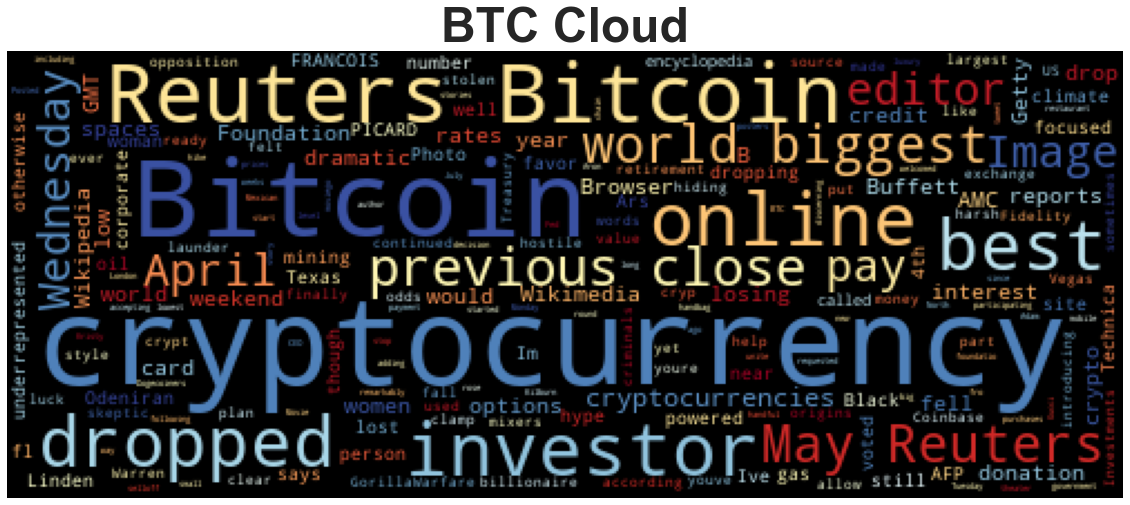

In [28]:
# Generate the Bitcoin word cloud
# Generate the Bitcoin word cloud
def wordcloud(text,title=""):
    df_cloud = WordCloud(stopwords=stop, width=500,colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize":48,"fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

wordcloud(btc.Text.str.cat(),title = "BTC Cloud", )

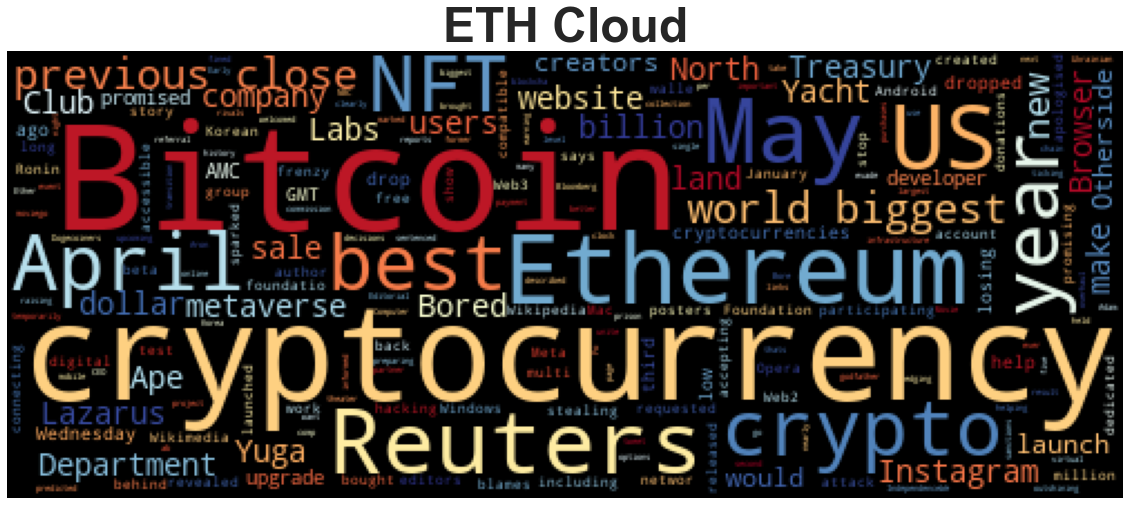

In [29]:
# Generate the Ethereum word cloud
wordcloud(eth.Text.str.cat(), title = "ETH Cloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [30]:
%pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [31]:
import spacy
from spacy import displacy

In [32]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [33]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [34]:
# Concatenate all of the Bitcoin text together
all_btc_txt = btc.Text.str.cat()

In [35]:
# Run the NER processor on all of the text
btc_doc = nlp(all_btc_txt)

# Add a title to the document
btc_doc.user_data["title"] = "BTC NER"# Run the NER processor on all of the text


In [36]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [37]:
# List all Entities
btc_entities = [ent.text for ent in btc_doc.ents]
btc_entities

['Odeniran',
 'Linden',
 'Texas',
 'April 4th, 2022',
 'Photo',
 'FRANCOIS PICARD/AFP',
 'Getty Images',
 "the Wikimedia Foundation's",
 'Ars Technica',
 'GorillaWarfare',
 'Buffett',
 'the weekend',
 'Getty Images\r\n',
 'the weekend',
 '34,000',
 '27,630',
 'Coinbase',
 'Last week',
 'Fidelity Investments',
 'the US Treasury',
 '15',
 'More than 200',
 'Wikipedia',
 'the Wikimedia Foundation',
 'last July',
 '33,000',
 'the week',
 'last week',
 'Fed',
 '26',
 'Reuters',
 '5.1%',
 '38,391.36',
 'Tuesday',
 '2,229.82',
 '16%',
 'year',
 '+339 chars]May 4',
 'Reuters',
 '5.7%',
 '39,862.84',
 'Wednesday',
 '2,102.94',
 '20.9%',
 'year',
 'Bitcoin',
 'Gucci handbag',
 'week',
 'Kristy Kilburn',
 'May 11',
 'Reuters',
 '7.23%',
 '28,758.29',
 'GMT',
 'Wednesday',
 '2,241.68',
 '40.4%',
 '+361 chars]May 9',
 'Reuters',
 '7.81%',
 '31,333.41',
 'GMT',
 'Monday',
 '2,655.98',
 '35%',
 'AMC',
 'April 15',
 'AMC',
 'Adam Aron',
 'Mexican',
 'North London',
 'a few weeks ago',
 '+2779',
 'Cryp

---

### Ethereum NER

In [38]:
# Concatenate all of the Ethereum text together
all_eth_txt = eth.Text.str.cat()

In [39]:
# Run the NER processor on all of the text
eth_doc = nlp(all_eth_txt)

# Add a title to the document
eth_doc.user_data["title"] = "ETH NER"

In [40]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [41]:
# List all Entities
eth_entities = [ent.text for ent in eth_doc.ents]
eth_entities

['The US Department of Treasury',
 'The US Treasury Department',
 'North Korean',
 '$625 million',
 'Ronin',
 '15',
 'More than 200',
 'Wikipedia',
 'the Wikimedia Foundation',
 '+4016',
 'Instagram',
 'US',
 'Instagram',
 'Crypto Browser',
 'January',
 'Windows, Mac',
 'Android',
 'Ethereum',
 'Yuga Labs',
 'Yacht Club',
 'Yuga Labs',
 'Otherside NFT',
 'April 30',
 'NFT',
 'Ethereum',
 'more than five years',
 '100,000',
 'North Korea',
 'US',
 'NBC News',
 'chars]April 26',
 'Reuters',
 'No.2',
 'second',
 'AMC',
 'April 15',
 'AMC',
 'Adam Aron',
 'Last night',
 'Bloomberg',
 'nearly a third',
 'a billion dollars',
 'IndependenceWe',
 'this week',
 'the Ukrainian Computer Emergency Response Team',
 'Slovakian',
 'Russia',
 'chars]40 days ago',
 '47,454',
 '34,007',
 '28%.About a third',
 'this week',
 'Ethereum',
 'Merge',
 'a few months after June',
 'first',
 'a year and a half ago',
 'The Order Flow',
 'Dan Robinson',
 "Georgios Konstantopoulos'",
 'August 20',
 '26',
 'Reuters'

---